In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import sparse_categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [4]:
x_train.shape[0]
# x_test.shape

50000

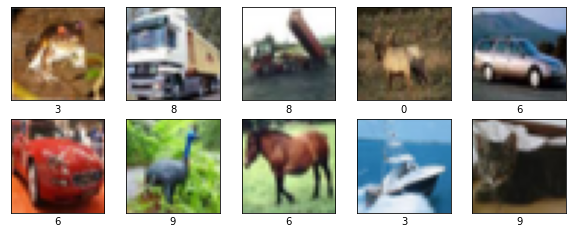

In [23]:

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='Greys')
    plt.xlabel(labels_pred[i])
plt.show()

In [7]:
img_rows = 32
img_cols = 32
batch_size = 512
im_shape = (img_rows, img_cols, 3)

# x_train = x_train.reshape(x_train.shape[0], img_cols, img_rows, 1)
# x_test = x_test.reshape(x_test.shape[0], img_cols, img_rows, 1)


print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print(im_shape)

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
(32, 32, 3)


In [8]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(img_rows,img_cols,3)))    
model.add(Conv2D(64, (3, 3), activation='relu'))    
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))    
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))    
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
    
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
    
model.add(Dense(10, activation='softmax'))   

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0

In [10]:
#Compiling the model
model.compile(loss='sparse_categorical_crossentropy',
      optimizer=Adam(lr=0.0001),
      metrics=['accuracy'])



In [11]:
#fitting the model
batch_size = 512
epochs = 80

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,validation_data=(x_test,y_test),
          verbose=1)

Epoch 1/80
98/98 [==============================] - 17s 169ms/step - loss: 3.5804 - accuracy: 0.1172 - val_loss: 2.2712 - val_accuracy: 0.1847
Epoch 2/80
98/98 [==============================] - 15s 151ms/step - loss: 2.1795 - accuracy: 0.1748 - val_loss: 2.0648 - val_accuracy: 0.2443
Epoch 3/80
98/98 [==============================] - 15s 151ms/step - loss: 1.9961 - accuracy: 0.2440 - val_loss: 1.8732 - val_accuracy: 0.3306
Epoch 4/80
98/98 [==============================] - 15s 152ms/step - loss: 1.8444 - accuracy: 0.2974 - val_loss: 1.7083 - val_accuracy: 0.3899
Epoch 5/80
98/98 [==============================] - 15s 153ms/step - loss: 1.7406 - accuracy: 0.3433 - val_loss: 1.6304 - val_accuracy: 0.4138
Epoch 6/80
98/98 [==============================] - 15s 154ms/step - loss: 1.6592 - accuracy: 0.3759 - val_loss: 1.5378 - val_accuracy: 0.4408
Epoch 7/80
98/98 [==============================] - 15s 154ms/step - loss: 1.5878 - accuracy: 0.4062 - val_loss: 1.4727 - val_accuracy: 0.4638

In [12]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.5434 - accuracy: 0.8328


[0.5433542728424072, 0.8327999711036682]

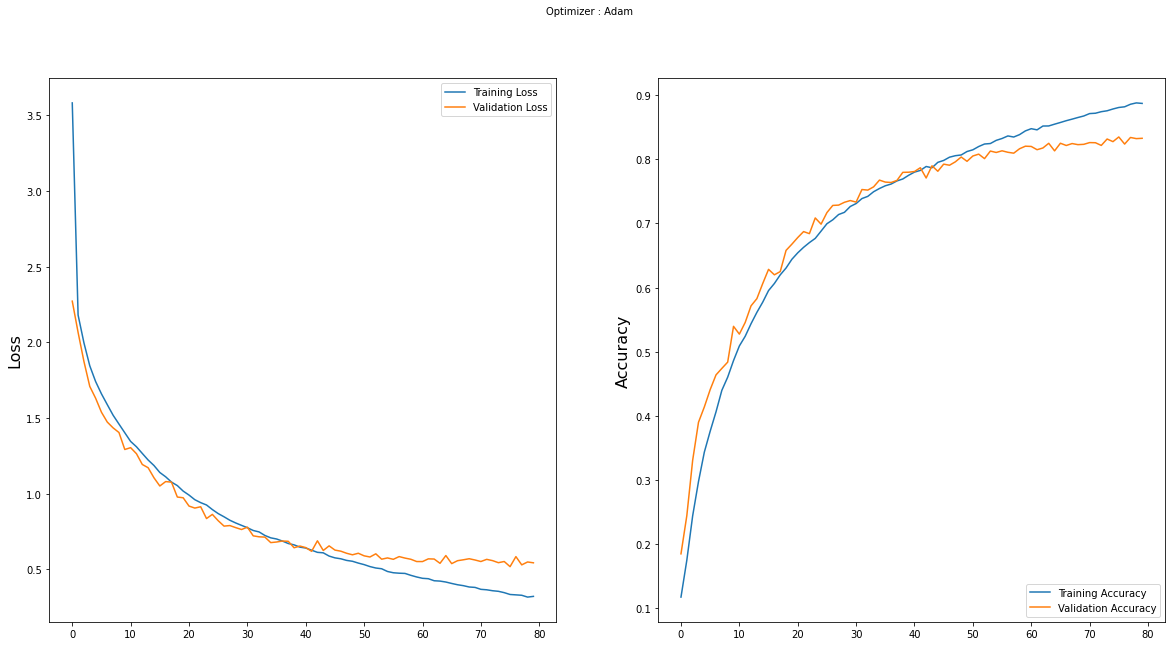

In [13]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


In [14]:
predictions = model.predict(
      x=x_test
    , batch_size=10
    , verbose=0
)



In [ ]:
for i in predictions:
    print(i)

In [16]:
labels_pred = np.argmax(predictions,axis=1)
print(labels_pred)



[3 8 8 ... 5 1 7]


In [17]:
correct = (labels_pred == y_test)
print(correct)


[[ True False False ... False False False]
 [False  True  True ... False False False]
 [False  True  True ... False False False]
 ...
 [False False False ...  True False False]
 [False False False ... False  True False]
 [False False False ... False False  True]]


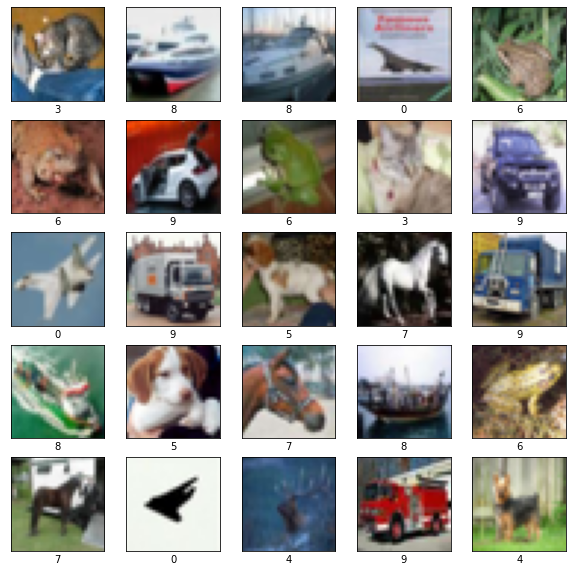

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(labels_pred[i])
plt.show()


In [19]:

print(y_test[0:25])

[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]
 [0]
 [9]
 [5]
 [7]
 [9]
 [8]
 [5]
 [7]
 [8]
 [6]
 [7]
 [0]
 [4]
 [9]
 [5]]
